# Presentación

## Introducción

**TUIA - Minería de Datos** - 2023

---

**Trabajo Práctico Nº 2:**

*   "Unidades 4 y 5"


**Alumno:**  

*   Miguel Mussi

## Objetivo

El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 4 y 5 en dos problemas reales asociados uno al comportamiento financiero de 1000 empresas y otro a un juego de cartas.

## Actividades (EDITAR)

1. Descargar un conjunto de datos, Crop_recommendation.csv, para realizar el trabajo práctico.

2. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de
datos, etc.) y elegir un método de estandarización.

3. Realizar PCA y determinar el número de componentes principales considerando alguno
de los 3 criterios datos en la práctica. Graficar la varianza acumulada y las componentes
de PCA en un grafico 2 o 3D con sus respectivas clases.

4. Aplicar Isomap y analizar los resultados obtenidos variando el numero de vecinos y
componentes. Realizar un grafico en 2D de utilizando dos componentes.

5. Aplicar t-SNE y analizar los resultados obtenidos variando el número de iteraciones,
componentes y perplejidad. Realizar un gráfico en 2D de utilizando dos componentes.

6. Aplicar K-means y analizar los resultados obtenidos variando el número de clusters y
obtener el número óptimo de clusters mediante GAP. Realizar un gráfico en 3D de
utilizando tres atributos de los datos y donde los colores estén asociados a los clusters.

7. Aplicar clustering jerárquico y determinar cuál número sería el que mejor represente los
datos. Utilizar el score de Silhouette y calcular el número óptimo de cluster por medio de
GAP.


# Desarrollo del TP

In [1]:
#@title Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.cluster import KMeans

In [2]:
#@title Sincronización con Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
#@title DataFrame

# Path 1 - Referenciado a la carpeta de Drive
file_path= '/content/drive/MyDrive/UNR/4 - Minería de Datos (IA43)/TP2/PokemonDB.csv'
data = pd.read_csv(file_path, sep=',', engine='python')

# Path 2 - Referenciado al mismo directorio
#df_original = pd.read_csv('Crop_recommendation.csv', sep=',', engine='python')

In [40]:
data.head()

,Name,Type,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,45,49,49,65,65,45
1,Ivysaur,Grass,60,62,63,80,80,60
2,Venusaur,Grass,80,82,83,100,100,80
3,Venusaur,Grass,80,100,123,122,120,80
4,Charmander,Fire,39,52,43,60,50,65


## Análisis exploratorio

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1190 non-null   object
 1   Type     1190 non-null   object
 2   HP       1190 non-null   int64 
 3   Attack   1190 non-null   int64 
 4   Defense  1190 non-null   int64 
 5   Sp. Atk  1190 non-null   int64 
 6   Sp. Def  1190 non-null   int64 
 7   Speed    1190 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 74.5+ KB


### Análisis de datos nulos o faltantes

In [42]:
data.isna().sum()

Name       0
Type       0
HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64

Se observa que no existen valores nulos ni faltantes.

### Recategorización del atributo "State".

In [43]:
data = data.drop(["Name"], axis=1)

In [44]:
data["Type"].value_counts()

Water       149
Normal      131
Grass       104
Bug          91
Psychic      82
Fire         75
Electric     73
Rock         67
Dark         56
Fighting     49
Dragon       47
Ghost        47
Poison       46
Ground       46
Ice          43
Steel        43
Fairy        31
Flying       10
Name: Type, dtype: int64

In [45]:
df['Type'] = df['Type'].astype('category')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     1190 non-null   object
 1   HP       1190 non-null   int64 
 2   Attack   1190 non-null   int64 
 3   Defense  1190 non-null   int64 
 4   Sp. Atk  1190 non-null   int64 
 5   Sp. Def  1190 non-null   int64 
 6   Speed    1190 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 65.2+ KB


Se analiza la distribución equitativa de las clases "Type"

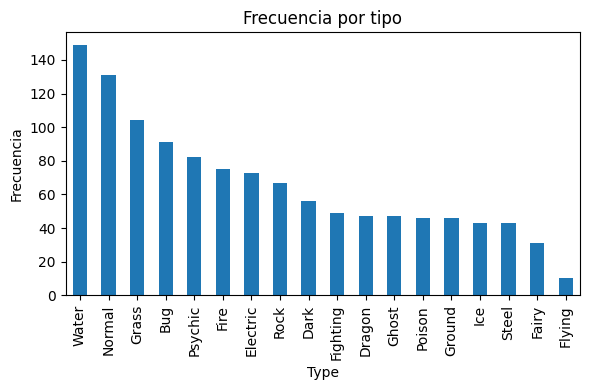

In [49]:
#@title Cantidad de registros por estado

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
data['Type'].value_counts().plot(kind='bar')
plt.title('Frecuencia por tipo')
plt.xlabel('Type')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [50]:
data.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,70.852941,80.957983,74.586555,72.756303,72.050420,69.695798
std,26.886443,32.119650,30.718212,32.658636,27.637522,30.204376
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,51.250000,56.000000,51.000000,50.000000,50.000000,45.000000
50%,70.000000,80.000000,70.000000,65.000000,70.000000,67.000000
75%,85.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


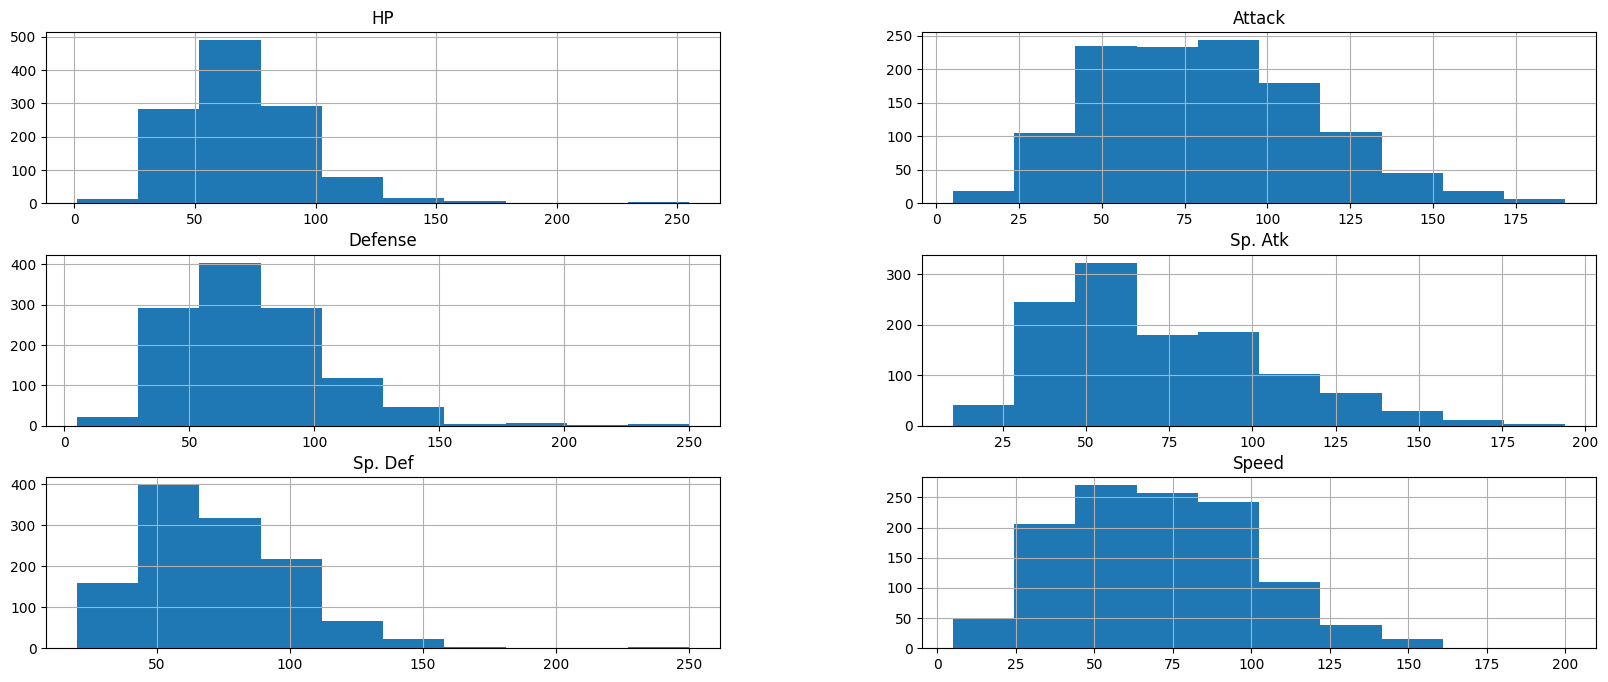

In [51]:
#@title Histogramas

data.hist(figsize=(20,8))
plt.show()

In [52]:
data.columns

Index(['Type', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], dtype='object')

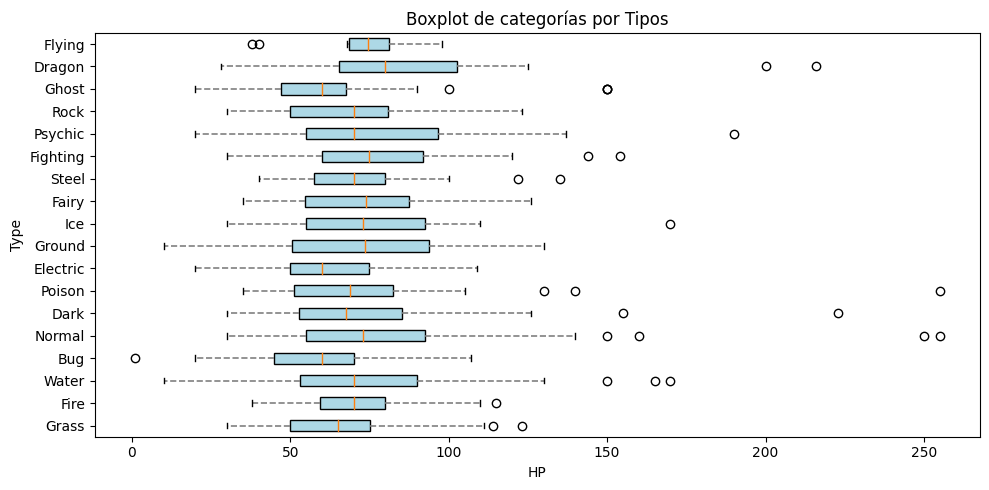

In [53]:
#@title Boxplot por atributos variables

# Variable a analizar
target = 'HP'

# Configuración de estilo y tamaño del gráfico
plt.figure(figsize=(10, 5))

# Crear el gráfico de boxplot con barrios en el eje vertical y precios en el eje horizontal
boxplot = plt.boxplot([data[data['Type'] == label][target] for label in data['Type'].unique()],
                      vert=False,  # Boxplots horizontales
                      patch_artist=True)  # Para personalizar colores de los cuadros

# Personalizar el color de los cuadros (box) y los bigotes (whisker)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.2, linestyle='--')

# Etiquetas y título del gráfico
plt.yticks(range(1, len(data['Type'].unique()) + 1), data['Type'].unique())  # Etiquetas en el eje y
plt.xlabel(target)
plt.ylabel('Type')
plt.title('Boxplot de categorías por Tipos')

# Desactivar notación científica en el eje horizontal (precios)
plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Detección y filtrado de Outliers


In [59]:
df = data.copy()

In [ ]:
# Dropping with outlier
#df = df[(df["MinTemp"]<2.3)&(df["MinTemp"]>-2.3)]
#df = df[(df["MaxTemp"]<2.3)&(df["MaxTemp"]>-2)]

## Correlaciones entre atributos

In [55]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.462999,0.323889,0.351247,0.388853,0.177610
Attack,0.462999,1.000000,0.469056,0.340029,0.271215,0.371056
Defense,0.323889,0.469056,1.000000,0.225578,0.534822,0.013146
Sp. Atk,0.351247,0.340029,0.225578,1.000000,0.518185,0.431643
Sp. Def,0.388853,0.271215,0.534822,0.518185,1.000000,0.229641
Speed,0.177610,0.371056,0.013146,0.431643,0.229641,1.000000


### Matriz de correlación

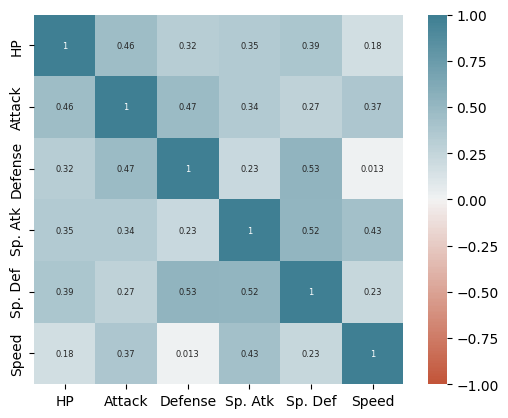

In [57]:
corr = df.drop(['Type'], axis=1).corr()
#corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.show()

### Estandarización

In [63]:
#@title Estandarización Z-score por librería
df_sub = df.drop(['Type'], axis=1) # Eliminación de variables no numéricas
scaler = StandardScaler() # Creación del objeto scaler
X_scaled = scaler.fit_transform(df_sub) # Cálculo de la media y la desviación estándar y aplicación de la transformación de estandarización.
df_std = pd.DataFrame(X_scaled, columns=df_sub.columns)
df_std

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-0.961965,-0.995385,-0.833294,-0.237596,-0.255210,-0.817967
1,-0.403828,-0.590478,-0.377347,0.221894,0.287758,-0.321141
2,0.340354,0.032455,0.274006,0.834547,1.011716,0.341293
3,0.340354,0.593096,1.576713,1.508465,1.735674,0.341293
4,-1.185219,-0.901945,-1.028700,-0.390759,-0.798179,-0.155533
...,...,...,...,...,...,...
1185,-0.589874,-0.029838,0.176303,1.906689,1.735674,1.003727
1186,1.270581,1.807816,-0.116806,-0.543923,1.047914,1.633039
1187,0.117099,1.527496,0.501980,1.447199,-0.436200,1.533674
1188,1.084536,1.683229,1.316172,0.375057,1.011716,2.162986


# Árbol de Decisión

In [64]:
df_train, df_test,  = train_test_split(df, test_size=0.3, random_state=1812)

In [66]:
# Extraer las etiquetas (variable objetivo) de la columna 'class' en los DataFrames 'df_train' y 'df_test', y convertirlas en arreglos NumPy.
train_labels = np.array(df_train['Type'])
test_labels = np.array(df_test['Type'])

# Elimino las etiquetas para separar las características (variables independientes) de la variable objetivo.
df_train = df_train.drop(['Type'], axis = 1)
df_test = df_test.drop(['Type'], axis = 1)

# Lista de nombres de características extrayendo los nombres de columna del DataFrame 'df_train' para usarlos luego.
feature_list = list(df_train.columns)

# Convierte los DataFrames modificados (sin la columna 'class') es decir, las características (variables independientes) a array.
train_features = np.array(df_train)
test_features = np.array(df_test)

In [67]:
feature_list

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [68]:
clf = tree.DecisionTreeClassifier()

In [69]:
#Entreno el modelo pasando las características de entrenamiento (train_features) y las etiquetas de entrenamiento correspondientes (train_labels).
decision_tree = clf.fit(train_features, train_labels)

# Predicción en el conjunto de entrenamiento
clf_predictions_train = clf.predict(train_features)

# Predicción en el conjunto de prueba
clf_predictions = clf.predict(test_features)

In [70]:
#Evaluo el rendimiento del modelo
train_accuracy = accuracy_score(train_labels, clf_predictions_train)
test_accuracy = accuracy_score(test_labels, clf_predictions)

In [71]:
train_accuracy

0.9795918367346939

In [ ]:
X = df_std.iloc[:, :4] # 'RyD_Spend', 'Administration', 'MarketingSpend', 'State'
y = df_std.iloc[:, 4] # Profits

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
feature_list = list(X_train.columns)
feature_list

['RyD_Spend', 'Administration', 'MarketingSpend', 'State']

### Aplicación de la técnica

In [ ]:
clf = tree.DecisionTreeRegressor()

In [ ]:
regressor_tree = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
from sklearn.tree import export_text
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 0.03
|   |--- RyD_Spend <= -0.90
|   |   |--- RyD_Spend <= -1.34
|   |   |   |--- RyD_Spend <= -1.74
|   |   |   |   |--- MarketingSpend <= -2.22
|   |   |   |   |   |--- RyD_Spend <= -1.75
|   |   |   |   |   |   |--- value: [-1.80]
|   |   |   |   |   |--- RyD_Spend >  -1.75
|   |   |   |   |   |   |--- value: [-1.96]
|   |   |   |   |--- MarketingSpend >  -2.22
|   |   |   |   |   |--- value: [-2.45]
|   |   |   |--- RyD_Spend >  -1.74
|   |   |   |   |--- RyD_Spend <= -1.54
|   |   |   |   |   |--- Administration <= -0.93
|   |   |   |   |   |   |--- RyD_Spend <= -1.68
|   |   |   |   |   |   |   |--- Administration <= -0.97
|   |   |   |   |   |   |   |   |--- RyD_Spend <= -1.72
|   |   |   |   |   |   |   |   |   |--- value: [-1.62]
|   |   |   |   |   |   |   |   |--- RyD_Spend >  -1.72
|   |   |   |   |   |   |   |   |   |--- RyD_Spend <= -1.72
|   |   |   |   |   |   |   |   |   |   |--- value: [-1.61]
|   |   |   |   |   |   |   |   |   |--- RyD_Spend >  -1.

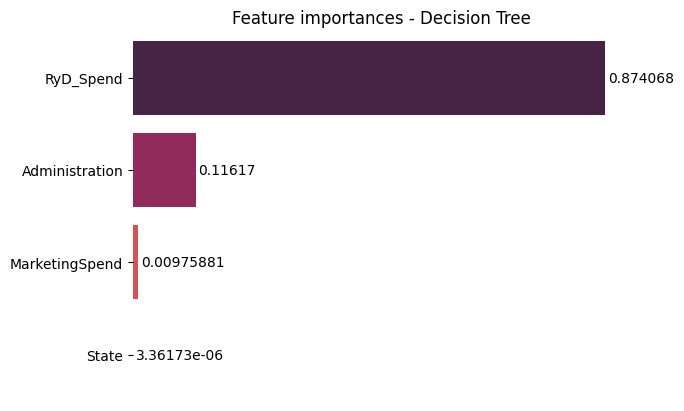

In [ ]:
features_df = pd.DataFrame({'features': feature_list, 'importances': regressor_tree.feature_importances_ })

features_df_sorted = features_df.sort_values(by='importances', ascending=False)

g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

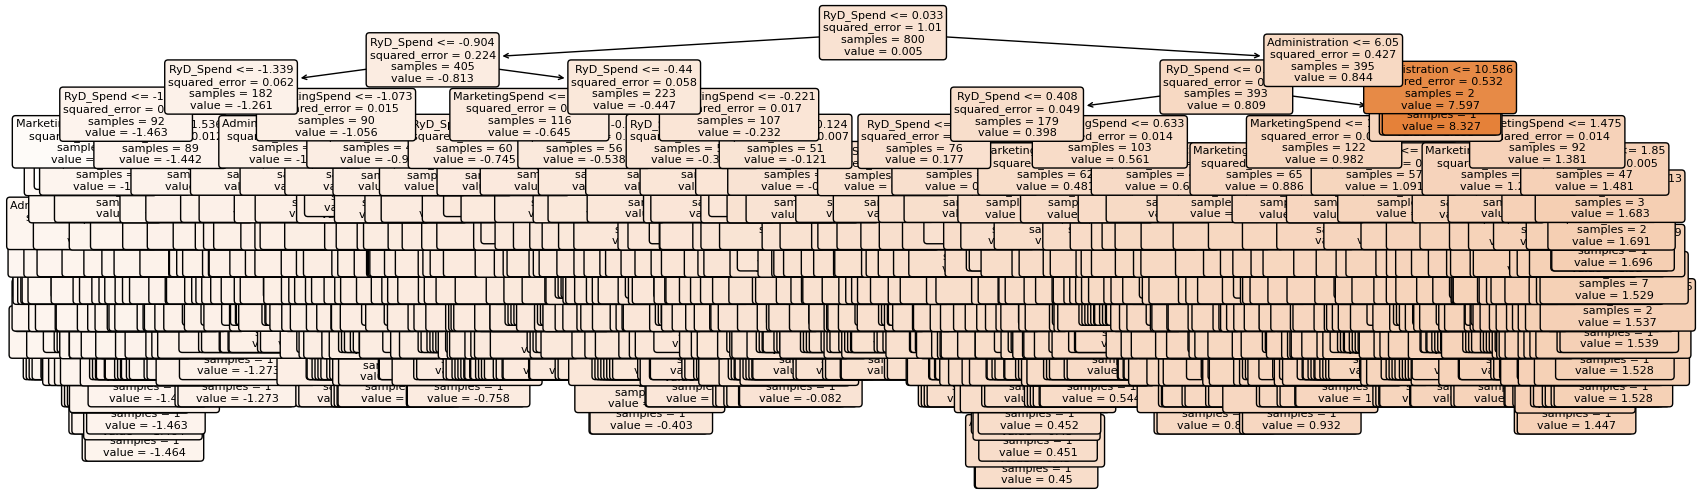

In [ ]:
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

## Optimización de Hiperparámetros

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error cuadrático medio (MSE) en el conjunto de prueba: 0.055492701797002414


## Métricas

In [ ]:
y_test = y_test.astype(float)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions) # medida de la bondad de ajuste del modelo

#primero calculamos el error absoluto porcentual (APE) para cada predicción y luego calculamos el MAPE promediando estos errores.
mape = np.mean(np.abs((y_test - predictions) / y_test) * 100)
# Calcular R-squared adjusted (R2 ajustado)
n = len(y_test)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores
rmse = np.sqrt(mse)

# Imprimir MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Percentage Error (MAPE): 1.6214452716671428
Mean Absolute Error (MAE): 0.021354828011722136
Mean Squared Error (MSE): 0.05561650766800989
Root Mean Squared Error (RMSE): 0.23583152390638934
R-squared (R2): 0.9419768201538908
R-squared adjusted (R2 ajustado): 0.9407866010801245
Root Mean Squared Error (RMSE): 0.23583152390638934


In [ ]:
tableResult = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
tableResult.head()

,Actual,Predicted
521,0.110185,0.117359
737,-0.193350,-0.196141
740,-0.657273,-0.661039
660,0.170310,0.173818
411,0.967223,0.968817
